# Import Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append(os.path.abspath('../src'))

import model_utility as util

In [2]:
df = pd.read_excel('../data/default of credit card clients.xls',header = 1)

In [3]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state= 42)

# Feature Engineering: Train data preparation

In [4]:
df_temp = df_train.copy()

In [5]:
print(df_temp.shape)
df_temp.head()

(21000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
28465,28466,240000,2,1,1,40,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
27622,27623,50000,2,1,2,23,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
28376,28377,50000,2,2,1,36,2,2,2,2,...,47956,43578,35126,0,4700,0,2004,3500,0,0
10917,10918,200000,2,3,1,54,6,5,4,3,...,102549,101400,0,0,0,0,0,0,0,0
27234,27235,240000,1,1,1,35,-1,-1,-1,0,...,17102,13367,22659,2017,21817,1120,13434,22772,22820,0


In [6]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [7]:
months_info = [
    ('Sep', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'),
    ('Aug', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2'),
    ('Jul', 'PAY_3', 'BILL_AMT3', 'PAY_AMT3'),
    ('Jun', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4'),
    ('May', 'PAY_5', 'BILL_AMT5', 'PAY_AMT5'),
    ('Apr', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'),
]

In [8]:
df_temp = util.generate_monthly_features(df_temp, months_info)

In [9]:
df_temp.rename(columns={'PAY_0':'PAY_Sep','PAY_2':'PAY_Aug','PAY_3':'PAY_Jul','PAY_4':'PAY_Jun','PAY_5':'PAY_May','PAY_6':'PAY_Apr'},inplace= True)

In [10]:
df_temp.rename(columns={'BILL_AMT1':'BILL_AMT_Sep','BILL_AMT2':'BILL_AMT_Aug','BILL_AMT3':'BILL_AMT_Jul','BILL_AMT4':'BILL_AMT_Jun','BILL_AMT5':'BILL_AMT_May','BILL_AMT6':'BILL_AMT_Apr'},inplace= True)

In [11]:
df_temp.rename(columns={'PAY_AMT1':'PAY_AMT_Sep','PAY_AMT2':'PAY_AMT_Aug','PAY_AMT3':'PAY_AMT_Jul','PAY_AMT4':'PAY_AMT_Jun','PAY_AMT5':'PAY_AMT_May','PAY_AMT6':'PAY_AMT_Apr'},inplace= True)

In [12]:
df_temp = util.reorder_columns_monthwise(df_temp)

In [13]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep', 'utilization_ratio Sep',
       'Paid Sep', 'Delinquent Sep', 'PAY_Aug', 'BILL_AMT_Aug',
       'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month'], dtype=object)

In [14]:
df_temp['EDUCATION'].value_counts(dropna= False)

2    9796
1    7433
3    3444
5     195
4      85
6      38
0       9
Name: EDUCATION, dtype: int64

In [15]:
mode_education_train = df_temp['EDUCATION'].mode()


In [16]:
df_temp['EDUCATION'] = np.where(df_temp['EDUCATION'] == 0, mode_education_train,df_temp['EDUCATION'])

In [17]:
education_mapping = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: "Others",
    5: "Others",
    6: "Others"
}

df_temp['EDUCATION'] = df_temp['EDUCATION'].map(education_mapping)

In [18]:
df_temp['EDUCATION'].value_counts(dropna= False)

University         9805
Graduate School    7433
High School        3444
Others              318
Name: EDUCATION, dtype: int64

In [19]:
df_temp['SEX'].value_counts(dropna= False)

2    12724
1     8276
Name: SEX, dtype: int64

In [20]:
gender_mapping = {
    1: 'Male',
    2: 'Female'
}

df_temp['SEX'] = df_temp['SEX'].map(gender_mapping)

In [21]:
df_temp['SEX'].value_counts(dropna= False)

Female    12724
Male       8276
Name: SEX, dtype: int64

In [22]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    11132
1     9605
3      228
0       35
Name: MARRIAGE, dtype: int64

In [23]:
mode_marriage_train = df_temp['MARRIAGE'].mode()

In [24]:
df_temp['MARRIAGE'] = np.where(df_temp['MARRIAGE'] == 0,2,df_temp['MARRIAGE'])

In [25]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    11167
1     9605
3      228
Name: MARRIAGE, dtype: int64

In [26]:
marital_mapping = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

df_temp['MARRIAGE'] = df_temp['MARRIAGE'].map(marital_mapping)

In [27]:
df_temp['MARRIAGE'].value_counts(dropna= False)

Single     11167
Married     9605
Others       228
Name: MARRIAGE, dtype: int64

In [28]:
df_temp.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT

In [29]:
df_temp.shape

(21000, 43)

In [30]:
# One-hot encoding without dropping any columns
df_temp = pd.get_dummies(df_temp, columns=['EDUCATION', 'SEX','MARRIAGE'], drop_first=False)

In [31]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'SEX_Female',
       'SEX_Male', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'], dtype=object)

In [32]:
#Columns to drop for multi-collinearity
col_to_drop = ['EDUCATION_Others','SEX_Female','MARRIAGE_Others']

In [33]:
df_temp.drop(columns= col_to_drop, inplace= True)

In [34]:
df_train = df_temp.copy()

In [35]:
print(df_train.shape)
df_train.head()

(21000, 46)


,ID,LIMIT_BAL,AGE,PAY_Sep,BILL_AMT_Sep,PAY_AMT_Sep,utilization_ratio Sep,Paid Sep,Delinquent Sep,PAY_Aug,...,utilization_ratio Apr,Paid Apr,Delinquent Apr,default payment next month,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,SEX_Male,MARRIAGE_Married,MARRIAGE_Single
0,28466,240000,40,-2,0,0,0.000000,0,0,-2,...,0.000000,0,0,1,1,0,0,0,1,0
1,27623,50000,23,-1,3430,2548,0.068600,1,0,-1,...,0.013200,1,0,0,1,0,0,0,0,1
2,28377,50000,36,2,46203,0,0.924060,0,1,2,...,0.702520,0,0,0,0,0,1,0,1,0
3,10918,200000,54,6,110185,0,0.550925,0,1,5,...,0.000000,0,1,0,0,1,0,0,1,0
4,27235,240000,35,-1,2024,2017,0.008433,1,0,-1,...,0.094412,1,0,0,1,0,0,1,1,0


In [36]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [37]:
# Binary features already in 0/1 format — manually completed
already_one_hot_encoded_cols = [
    'Paid Sep', 'Delinquent Sep',
    'Paid Aug', 'Delinquent Aug',
    'Paid Jul', 'Delinquent Jul',
    'Paid Jun', 'Delinquent Jun',
    'Paid May', 'Delinquent May',
    'Paid Apr', 'Delinquent Apr',
    'EDUCATION_Graduate School', 'EDUCATION_High School',
    'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
    'MARRIAGE_Single'
]

In [38]:
cols_to_ignore_for_woe = already_one_hot_encoded_cols + ['ID']

In [39]:
cols_to_ignore_for_woe

['Paid Sep',
 'Delinquent Sep',
 'Paid Aug',
 'Delinquent Aug',
 'Paid Jul',
 'Delinquent Jul',
 'Paid Jun',
 'Delinquent Jun',
 'Paid May',
 'Delinquent May',
 'Paid Apr',
 'Delinquent Apr',
 'EDUCATION_Graduate School',
 'EDUCATION_High School',
 'EDUCATION_University',
 'SEX_Male',
 'MARRIAGE_Married',
 'MARRIAGE_Single',
 'ID']

In [40]:
woe_temp,iv_df = util.compute_iv_optimize(df_train.drop(columns=cols_to_ignore_for_woe),target = 'default payment next month',min_bin_pct= 0.02,plot = False)

In [41]:
woe_temp

,Feature,bin,Total Observations,Non events,Events,% of Non events,% of Events,WoE,IV
0,LIMIT_BAL,"(9999.999, 30000.0]",2843,1790,1053,0.109654,0.225192,-0.719621,0.083144
1,LIMIT_BAL,"(30000.0, 140000.0]",7886,5899,1987,0.361370,0.424936,-0.162036,0.010300
2,LIMIT_BAL,"(140000.0, 1000000.0]",10271,8635,1636,0.528976,0.349872,0.413376,0.074037
3,AGE,"(20.999, 25.0]",2745,2006,739,0.122887,0.158041,-0.251593,0.008845
4,AGE,"(25.0, 75.0]",18255,14318,3937,0.877113,0.841959,0.040905,0.001438
...,...,...,...,...,...,...,...,...,...
70,PAY_AMT_Apr,"(1500.0, 5000.0]",6339,5087,1252,0.311627,0.267750,0.151753,0.006658
71,PAY_AMT_Apr,"(5000.0, 527143.0]",3971,3414,557,0.209140,0.119119,0.562881,0.050671
72,utilization_ratio Apr,"(-1.511, 0.349]",12600,10302,2298,0.631095,0.491446,0.250105,0.034927
73,utilization_ratio Apr,"(0.349, 0.671]",4200,3198,1002,0.195908,0.214286,-0.089666,0.001648


In [42]:
df_train_woe = util.apply_woe_binning(df_train, woe_temp)

In [43]:
df_train_woe.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [44]:
df_train_woe['SEX_Male'].value_counts(dropna= False)

0    12724
1     8276
Name: SEX_Male, dtype: int64

# Feature Elimination: Train Data

In [45]:
iv_features = iv_df[iv_df['IV'] >= 0.02]['Feature'].tolist()

In [46]:
iv_features

['LIMIT_BAL',
 'PAY_AMT_Apr',
 'PAY_AMT_Aug',
 'PAY_AMT_Jul',
 'PAY_AMT_Jun',
 'PAY_AMT_May',
 'PAY_AMT_Sep',
 'PAY_Apr',
 'PAY_Aug',
 'PAY_Jul',
 'PAY_Jun',
 'PAY_May',
 'PAY_Sep',
 'utilization_ratio Apr',
 'utilization_ratio Aug',
 'utilization_ratio Jul',
 'utilization_ratio Jun',
 'utilization_ratio May',
 'utilization_ratio Sep']

In [47]:
already_one_hot_encoded_cols

['Paid Sep',
 'Delinquent Sep',
 'Paid Aug',
 'Delinquent Aug',
 'Paid Jul',
 'Delinquent Jul',
 'Paid Jun',
 'Delinquent Jun',
 'Paid May',
 'Delinquent May',
 'Paid Apr',
 'Delinquent Apr',
 'EDUCATION_Graduate School',
 'EDUCATION_High School',
 'EDUCATION_University',
 'SEX_Male',
 'MARRIAGE_Married',
 'MARRIAGE_Single']

In [48]:
cols_to_select = iv_features + already_one_hot_encoded_cols

In [49]:
len(cols_to_select)

37

In [50]:
cols_to_select.append('default payment next month')

In [51]:
len(cols_to_select)

38

In [52]:
df_train_woe = df_train_woe[cols_to_select]

In [53]:
features = list(woe_temp['Feature'].unique())

monotonic_increase = []
monotonic_decrease = []
non_monotonic = []

for att in features:
    if woe_temp[woe_temp['Feature'] == att]['WoE'].is_monotonic_increasing:
        monotonic_increase.append(att)
    elif woe_temp[woe_temp['Feature'] == att]['WoE'].is_monotonic_decreasing:
        monotonic_decrease.append(att)
    else:
        non_monotonic.append(att)


In [54]:
monotonic_increase

['LIMIT_BAL',
 'AGE',
 'BILL_AMT_Sep',
 'PAY_AMT_Sep',
 'BILL_AMT_Aug',
 'PAY_AMT_Aug',
 'PAY_AMT_Jul',
 'BILL_AMT_Jun',
 'PAY_AMT_Jun',
 'PAY_AMT_May',
 'PAY_AMT_Apr']

In [55]:
monotonic_decrease

['PAY_Sep',
 'PAY_Aug',
 'PAY_Jul',
 'PAY_Jun',
 'PAY_May',
 'utilization_ratio May',
 'PAY_Apr',
 'BILL_AMT_Apr',
 'utilization_ratio Apr']

In [56]:
non_monotonic

['utilization_ratio Sep',
 'utilization_ratio Aug',
 'BILL_AMT_Jul',
 'utilization_ratio Jul',
 'utilization_ratio Jun',
 'BILL_AMT_May']

In [57]:
df_train_woe.columns

Index(['LIMIT_BAL', 'PAY_AMT_Apr', 'PAY_AMT_Aug', 'PAY_AMT_Jul', 'PAY_AMT_Jun',
       'PAY_AMT_May', 'PAY_AMT_Sep', 'PAY_Apr', 'PAY_Aug', 'PAY_Jul',
       'PAY_Jun', 'PAY_May', 'PAY_Sep', 'utilization_ratio Apr',
       'utilization_ratio Aug', 'utilization_ratio Jul',
       'utilization_ratio Jun', 'utilization_ratio May',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'Paid Aug',
       'Delinquent Aug', 'Paid Jul', 'Delinquent Jul', 'Paid Jun',
       'Delinquent Jun', 'Paid May', 'Delinquent May', 'Paid Apr',
       'Delinquent Apr', 'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single', 'default payment next month'],
      dtype='object')

In [58]:
slect_features = list(set(cols_to_select) - set(non_monotonic))

In [59]:
slect_features

['Paid Jun',
 'EDUCATION_Graduate School',
 'PAY_AMT_Sep',
 'EDUCATION_High School',
 'Delinquent Aug',
 'Delinquent Jun',
 'PAY_AMT_Apr',
 'PAY_Jul',
 'Delinquent Apr',
 'LIMIT_BAL',
 'MARRIAGE_Married',
 'Paid Sep',
 'Paid Apr',
 'PAY_AMT_Jul',
 'utilization_ratio Apr',
 'Delinquent May',
 'PAY_AMT_Jun',
 'PAY_Aug',
 'PAY_AMT_May',
 'EDUCATION_University',
 'Paid Aug',
 'utilization_ratio May',
 'Delinquent Sep',
 'default payment next month',
 'Delinquent Jul',
 'SEX_Male',
 'PAY_AMT_Aug',
 'Paid Jul',
 'MARRIAGE_Single',
 'PAY_Sep',
 'PAY_Apr',
 'PAY_May',
 'Paid May',
 'PAY_Jun']

In [60]:
df_train_woe = df_train_woe[slect_features]

In [61]:
df_train_woe.shape

(21000, 34)

In [62]:
df_train_woe.dtypes

Paid Jun                        int64
EDUCATION_Graduate School       uint8
PAY_AMT_Sep                   float64
EDUCATION_High School           uint8
Delinquent Aug                  int64
Delinquent Jun                  int64
PAY_AMT_Apr                   float64
PAY_Jul                       float64
Delinquent Apr                  int64
LIMIT_BAL                     float64
MARRIAGE_Married                uint8
Paid Sep                        int64
Paid Apr                        int64
PAY_AMT_Jul                   float64
utilization_ratio Apr         float64
Delinquent May                  int64
PAY_AMT_Jun                   float64
PAY_Aug                       float64
PAY_AMT_May                   float64
EDUCATION_University            uint8
Paid Aug                        int64
utilization_ratio May         float64
Delinquent Sep                  int64
default payment next month      int64
Delinquent Jul                  int64
SEX_Male                        uint8
PAY_AMT_Aug 

In [63]:
features_in_woe = woe_temp['Feature'].unique().tolist()

for cols in df_train_woe.columns: 
    if cols in features_in_woe:
        df_train_woe[cols] = df_train_woe[cols].astype('float')

In [64]:
df_train_woe.dtypes

Paid Jun                        int64
EDUCATION_Graduate School       uint8
PAY_AMT_Sep                   float64
EDUCATION_High School           uint8
Delinquent Aug                  int64
Delinquent Jun                  int64
PAY_AMT_Apr                   float64
PAY_Jul                       float64
Delinquent Apr                  int64
LIMIT_BAL                     float64
MARRIAGE_Married                uint8
Paid Sep                        int64
Paid Apr                        int64
PAY_AMT_Jul                   float64
utilization_ratio Apr         float64
Delinquent May                  int64
PAY_AMT_Jun                   float64
PAY_Aug                       float64
PAY_AMT_May                   float64
EDUCATION_University            uint8
Paid Aug                        int64
utilization_ratio May         float64
Delinquent Sep                  int64
default payment next month      int64
Delinquent Jul                  int64
SEX_Male                        uint8
PAY_AMT_Aug 

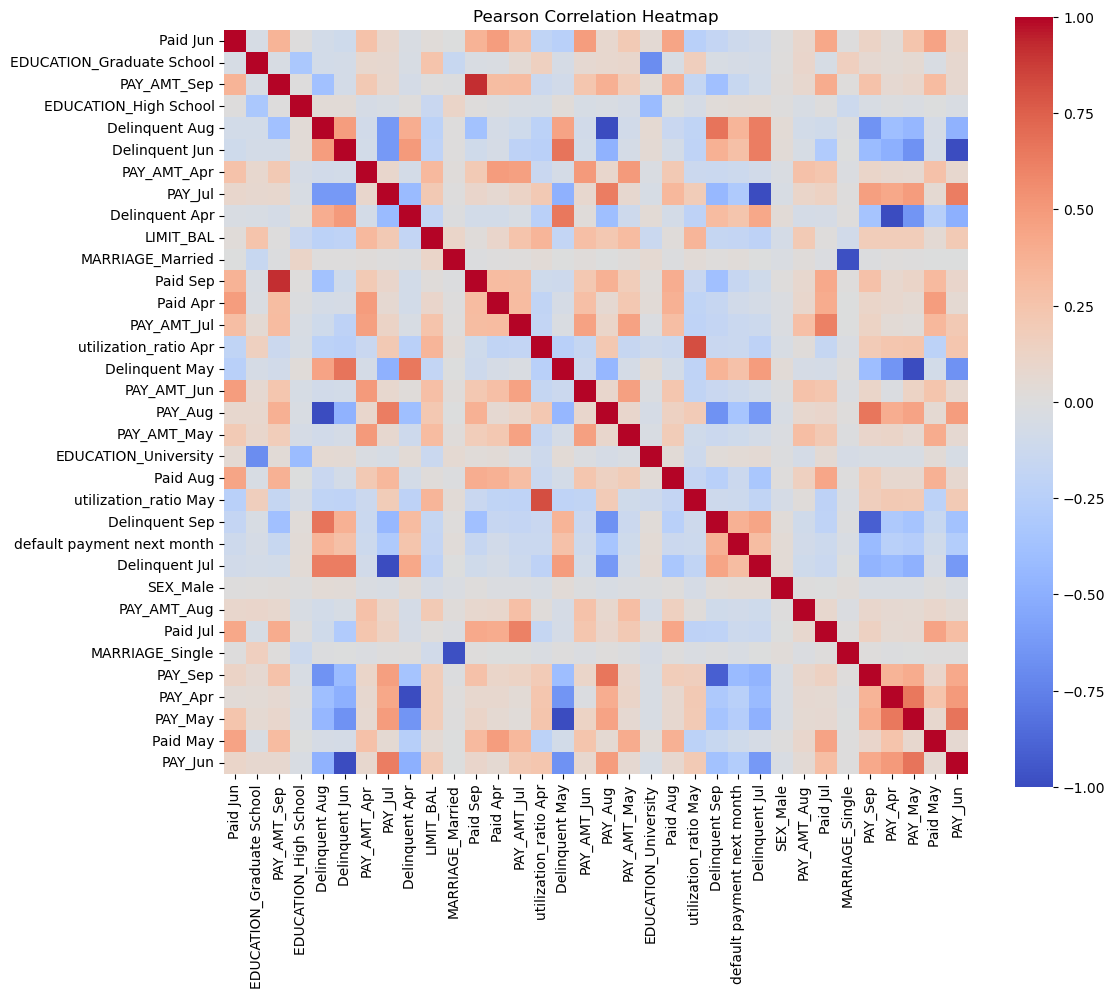

,Feature 1,Feature 2,Correlation,Absolute Correlation
0,Delinquent May,PAY_May,-1.000000,1.000000
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000
2,Delinquent Aug,PAY_Aug,-1.000000,1.000000
3,Delinquent Jun,PAY_Jun,-1.000000,1.000000
4,Delinquent Apr,PAY_Apr,-1.000000,1.000000
5,MARRIAGE_Married,MARRIAGE_Single,-0.978401,0.978401
6,PAY_AMT_Sep,Paid Sep,0.920457,0.920457
7,Delinquent Sep,PAY_Sep,-0.908848,0.908848
8,utilization_ratio Apr,utilization_ratio May,0.816214,0.816214
9,EDUCATION_Graduate School,EDUCATION_University,-0.692711,0.692711


In [65]:
# Assuming df_train is your DataFrame
correlation_table = util.correlation_summary(df_train_woe)

# View top correlations
correlation_table.head(10)

In [66]:
iv_df

,Feature,IV
0,AGE,0.010283
1,BILL_AMT_Apr,0.004611
2,BILL_AMT_Aug,0.003012
3,BILL_AMT_Jul,0.008554
4,BILL_AMT_Jun,0.001147
5,BILL_AMT_May,0.014649
6,BILL_AMT_Sep,0.005165
7,LIMIT_BAL,0.167481
8,PAY_AMT_Apr,0.090321
9,PAY_AMT_Aug,0.059331


In [67]:
# Step 1: Join IV for Feature 1
correlation_with_iv = correlation_table.merge(
    iv_df.rename(columns={'Feature': 'Feature 1', 'IV': 'IV Feature 1'}),
    on='Feature 1',
    how='left'
)

# Step 2: Join IV for Feature 2
correlation_with_iv = correlation_with_iv.merge(
    iv_df.rename(columns={'Feature': 'Feature 2', 'IV': 'IV Feature 2'}),
    on='Feature 2',
    how='left'
)

# Final output
correlation_with_iv = correlation_with_iv[
    ['Feature 1', 'Feature 2', 'Correlation', 'Absolute Correlation', 'IV Feature 1', 'IV Feature 2']
]

In [68]:
correlation_with_iv

,Feature 1,Feature 2,Correlation,Absolute Correlation,IV Feature 1,IV Feature 2
0,Delinquent May,PAY_May,-1.000000,1.000000,NaN,0.327989
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000,0.434986,NaN
2,Delinquent Aug,PAY_Aug,-1.000000,1.000000,NaN,0.569411
3,Delinquent Jun,PAY_Jun,-1.000000,1.000000,NaN,0.366326
4,Delinquent Apr,PAY_Apr,-1.000000,1.000000,NaN,0.281494
...,...,...,...,...,...,...
556,MARRIAGE_Married,Delinquent Jul,-0.000342,0.000342,NaN,NaN
557,PAY_Jul,MARRIAGE_Married,0.000342,0.000342,0.434986,NaN
558,PAY_Jul,MARRIAGE_Single,0.000233,0.000233,0.434986,NaN
559,Delinquent Jul,MARRIAGE_Single,-0.000233,0.000233,NaN,NaN


In [69]:
high_corr_df = correlation_with_iv[correlation_with_iv['Absolute Correlation'] >= 0.8]

In [70]:
high_corr_df

,Feature 1,Feature 2,Correlation,Absolute Correlation,IV Feature 1,IV Feature 2
0,Delinquent May,PAY_May,-1.000000,1.000000,NaN,0.327989
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000,0.434986,NaN
2,Delinquent Aug,PAY_Aug,-1.000000,1.000000,NaN,0.569411
3,Delinquent Jun,PAY_Jun,-1.000000,1.000000,NaN,0.366326
4,Delinquent Apr,PAY_Apr,-1.000000,1.000000,NaN,0.281494
5,MARRIAGE_Married,MARRIAGE_Single,-0.978401,0.978401,NaN,NaN
6,PAY_AMT_Sep,Paid Sep,0.920457,0.920457,0.125502,NaN
7,Delinquent Sep,PAY_Sep,-0.908848,0.908848,NaN,0.871415
8,utilization_ratio Apr,utilization_ratio May,0.816214,0.816214,0.100997,0.078822


In [71]:
df_train_woe.columns

Index(['Paid Jun', 'EDUCATION_Graduate School', 'PAY_AMT_Sep',
       'EDUCATION_High School', 'Delinquent Aug', 'Delinquent Jun',
       'PAY_AMT_Apr', 'PAY_Jul', 'Delinquent Apr', 'LIMIT_BAL',
       'MARRIAGE_Married', 'Paid Sep', 'Paid Apr', 'PAY_AMT_Jul',
       'utilization_ratio Apr', 'Delinquent May', 'PAY_AMT_Jun', 'PAY_Aug',
       'PAY_AMT_May', 'EDUCATION_University', 'Paid Aug',
       'utilization_ratio May', 'Delinquent Sep', 'default payment next month',
       'Delinquent Jul', 'SEX_Male', 'PAY_AMT_Aug', 'Paid Jul',
       'MARRIAGE_Single', 'PAY_Sep', 'PAY_Apr', 'PAY_May', 'Paid May',
       'PAY_Jun'],
      dtype='object')

In [72]:
high_corr_to_drop = ['Delinquent Aug','Delinquent Sep','Delinquent May','Delinquent Apr','Delinquent Jul','Delinquent Jun']

In [73]:
df_train_woe.drop(columns=high_corr_to_drop,inplace= True)

In [74]:
print(df_train_woe.shape)
df_train_woe.head()

(21000, 28)


,Paid Jun,EDUCATION_Graduate School,PAY_AMT_Sep,EDUCATION_High School,PAY_AMT_Apr,PAY_Jul,LIMIT_BAL,MARRIAGE_Married,Paid Sep,Paid Apr,...,default payment next month,SEX_Male,PAY_AMT_Aug,Paid Jul,MARRIAGE_Single,PAY_Sep,PAY_Apr,PAY_May,Paid May,PAY_Jun
0,0,1,-0.638323,0,-0.246391,0.323462,0.413376,1,0,0,...,1,0,-0.070933,0,0,0.572969,0.214400,0.227175,0,0.265533
1,1,1,0.198678,0,0.151753,0.323462,-0.162036,0,1,1,...,0,0,-0.070933,1,1,0.572969,0.214400,0.227175,1,0.265533
2,1,0,-0.638323,0,-0.246391,-1.394027,-0.162036,1,0,0,...,0,0,-0.070933,0,0,-2.093205,0.214400,0.227175,1,-1.421810
3,0,0,-0.638323,1,-0.246391,-1.394027,0.413376,1,0,0,...,0,0,-0.070933,0,0,-2.093205,-1.343668,-1.483083,0,-1.421810
4,1,1,0.198678,0,0.562881,0.323462,0.413376,1,1,1,...,0,1,0.840548,1,0,0.572969,0.214400,0.227175,1,0.265533


In [75]:
df_train_woe.columns

Index(['Paid Jun', 'EDUCATION_Graduate School', 'PAY_AMT_Sep',
       'EDUCATION_High School', 'PAY_AMT_Apr', 'PAY_Jul', 'LIMIT_BAL',
       'MARRIAGE_Married', 'Paid Sep', 'Paid Apr', 'PAY_AMT_Jul',
       'utilization_ratio Apr', 'PAY_AMT_Jun', 'PAY_Aug', 'PAY_AMT_May',
       'EDUCATION_University', 'Paid Aug', 'utilization_ratio May',
       'default payment next month', 'SEX_Male', 'PAY_AMT_Aug', 'Paid Jul',
       'MARRIAGE_Single', 'PAY_Sep', 'PAY_Apr', 'PAY_May', 'Paid May',
       'PAY_Jun'],
      dtype='object')

# Feature Selection: Train Data

In [76]:
X_train = df_train_woe.drop(columns='default payment next month')
y_train = df_train_woe['default payment next month']

In [77]:
# Assuming you have:
# X = your feature dataframe (after one-hot encoding)
# y = your target variable

selected_features, final_model = util.backward_elimination(X_train, y_train)

# Print final retained features
print("Selected features:", selected_features)

# View summary
print(final_model.summary())


Dropping 'PAY_AMT_May' with p-value 0.9890
Dropping 'MARRIAGE_Married' with p-value 0.8315
Dropping 'Paid Aug' with p-value 0.6801
Dropping 'PAY_AMT_Sep' with p-value 0.4750
Dropping 'Paid May' with p-value 0.4425
Dropping 'Paid Apr' with p-value 0.5024
Dropping 'utilization_ratio May' with p-value 0.0925
Dropping 'PAY_May' with p-value 0.0579
Dropping 'Paid Jul' with p-value 0.0905
Selected features: ['const', 'Paid Jun', 'EDUCATION_Graduate School', 'EDUCATION_High School', 'PAY_AMT_Apr', 'PAY_Jul', 'LIMIT_BAL', 'Paid Sep', 'PAY_AMT_Jul', 'utilization_ratio Apr', 'PAY_AMT_Jun', 'PAY_Aug', 'EDUCATION_University', 'SEX_Male', 'PAY_AMT_Aug', 'MARRIAGE_Single', 'PAY_Sep', 'PAY_Apr', 'PAY_Jun']
                                OLS Regression Results                                
Dep. Variable:     default payment next month   R-squared:                       0.214
Model:                                    OLS   Adj. R-squared:                  0.213
Method:                         Least 

In [78]:
selected_features

['const',
 'Paid Jun',
 'EDUCATION_Graduate School',
 'EDUCATION_High School',
 'PAY_AMT_Apr',
 'PAY_Jul',
 'LIMIT_BAL',
 'Paid Sep',
 'PAY_AMT_Jul',
 'utilization_ratio Apr',
 'PAY_AMT_Jun',
 'PAY_Aug',
 'EDUCATION_University',
 'SEX_Male',
 'PAY_AMT_Aug',
 'MARRIAGE_Single',
 'PAY_Sep',
 'PAY_Apr',
 'PAY_Jun']

In [79]:
len(selected_features) - 1

18

# Feature Engineering: Test Data

In [80]:
df_temp = df_test.copy()

In [81]:
print(df_temp.shape)
df_temp.head()

(9000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2308,2309,30000,1,2,2,25,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
22404,22405,150000,2,1,2,26,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
23397,23398,70000,2,3,1,32,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
25058,25059,130000,1,3,2,49,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
2664,2665,50000,2,2,2,36,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1


In [82]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [83]:
months_info = [
    ('Sep', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'),
    ('Aug', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2'),
    ('Jul', 'PAY_3', 'BILL_AMT3', 'PAY_AMT3'),
    ('Jun', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4'),
    ('May', 'PAY_5', 'BILL_AMT5', 'PAY_AMT5'),
    ('Apr', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'),
]

In [84]:
df_temp = util.generate_monthly_features(df_temp, months_info)

In [85]:
df_temp.rename(columns={'PAY_0':'PAY_Sep','PAY_2':'PAY_Aug','PAY_3':'PAY_Jul','PAY_4':'PAY_Jun','PAY_5':'PAY_May','PAY_6':'PAY_Apr'},inplace= True)

In [86]:
df_temp.rename(columns={'BILL_AMT1':'BILL_AMT_Sep','BILL_AMT2':'BILL_AMT_Aug','BILL_AMT3':'BILL_AMT_Jul','BILL_AMT4':'BILL_AMT_Jun','BILL_AMT5':'BILL_AMT_May','BILL_AMT6':'BILL_AMT_Apr'},inplace= True)

In [87]:
df_temp.rename(columns={'PAY_AMT1':'PAY_AMT_Sep','PAY_AMT2':'PAY_AMT_Aug','PAY_AMT3':'PAY_AMT_Jul','PAY_AMT4':'PAY_AMT_Jun','PAY_AMT5':'PAY_AMT_May','PAY_AMT6':'PAY_AMT_Apr'},inplace= True)

In [88]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr',
       'BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun',
       'BILL_AMT_May', 'BILL_AMT_Apr', 'PAY_AMT_Sep', 'PAY_AMT_Aug',
       'PAY_AMT_Jul', 'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Apr',
       'default payment next month', 'utilization_ratio Sep', 'Paid Sep',
       'Delinquent Sep', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'utilization_ratio Jul', 'Paid Jul',
       'Delinquent Jul', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'utilization_ratio May', 'Paid May',
       'Delinquent May', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr'], dtype=object)

In [89]:
df_temp = util.reorder_columns_monthwise(df_temp)

In [90]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep', 'utilization_ratio Sep',
       'Paid Sep', 'Delinquent Sep', 'PAY_Aug', 'BILL_AMT_Aug',
       'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month'], dtype=object)

In [91]:
df_temp['EDUCATION'].value_counts(dropna= False)

2    4234
1    3152
3    1473
5      85
4      38
6      13
0       5
Name: EDUCATION, dtype: int64

In [92]:
df_temp['EDUCATION'] = np.where(df_temp['EDUCATION'] == 0, mode_education_train,df_temp['EDUCATION'])

In [93]:
education_mapping = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: "Others",
    5: "Others",
    6: "Others"
}

df_temp['EDUCATION'] = df_temp['EDUCATION'].map(education_mapping)

In [94]:
df_temp['EDUCATION'].value_counts(dropna= False)

University         4239
Graduate School    3152
High School        1473
Others              136
Name: EDUCATION, dtype: int64

In [95]:
df_temp['SEX'].value_counts(dropna= False)

2    5388
1    3612
Name: SEX, dtype: int64

In [96]:
gender_mapping = {
    1: 'Male',
    2: 'Female'
}

df_temp['SEX'] = df_temp['SEX'].map(gender_mapping)

In [97]:
df_temp['SEX'].value_counts(dropna= False)

Female    5388
Male      3612
Name: SEX, dtype: int64

In [98]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    4832
1    4054
3      95
0      19
Name: MARRIAGE, dtype: int64

In [99]:
df_temp['MARRIAGE'] = np.where(df_temp['MARRIAGE'] == 0,2,df_temp['MARRIAGE'])

In [100]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    4851
1    4054
3      95
Name: MARRIAGE, dtype: int64

In [101]:
marital_mapping = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

df_temp['MARRIAGE'] = df_temp['MARRIAGE'].map(marital_mapping)

In [102]:
df_temp['MARRIAGE'].value_counts(dropna= False)

Single     4851
Married    4054
Others       95
Name: MARRIAGE, dtype: int64

In [103]:
df_temp.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT

In [104]:
df_temp.shape

(9000, 43)

In [105]:
# One-hot encoding without dropping any columns
df_temp = pd.get_dummies(df_temp, columns=['EDUCATION', 'SEX','MARRIAGE'], drop_first=False)

In [106]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'SEX_Female',
       'SEX_Male', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'], dtype=object)

In [107]:
#Columns to drop for multi-collinearity
col_to_drop = ['EDUCATION_Others','SEX_Female','MARRIAGE_Others']

In [108]:
df_temp.drop(columns= col_to_drop, inplace= True)

In [109]:
df_test = df_temp.copy()

In [110]:
print(df_test.shape)
df_test.head()

(9000, 46)


,ID,LIMIT_BAL,AGE,PAY_Sep,BILL_AMT_Sep,PAY_AMT_Sep,utilization_ratio Sep,Paid Sep,Delinquent Sep,PAY_Aug,...,utilization_ratio Apr,Paid Apr,Delinquent Apr,default payment next month,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,SEX_Male,MARRIAGE_Married,MARRIAGE_Single
0,2309,30000,25,0,8864,1500,0.295467,1,0,0,...,0.494267,1,0,0,0,0,1,1,0,1
1,22405,150000,26,0,136736,4486,0.911573,1,0,0,...,0.515093,1,0,0,1,0,0,0,0,1
2,23398,70000,32,0,70122,2431,1.001743,1,0,0,...,1.003029,1,0,0,0,1,0,0,1,0
3,25059,130000,49,0,20678,1610,0.159062,1,0,0,...,0.053415,1,0,0,0,1,0,1,0,1
4,2665,50000,36,0,94228,2000,1.884560,1,0,0,...,0.388780,1,1,1,0,0,1,0,0,1


In [111]:
df_test.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [112]:
df_test_woe = util.apply_woe_binning(df_test, woe_temp)

In [113]:
df_test_woe.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [114]:
df_test_woe['BILL_AMT_Apr'].value_counts(dropna= False)

-0.054388    5385
 0.084808    3615
Name: BILL_AMT_Apr, dtype: int64

In [115]:
df[df['ID']==291]['BILL_AMT6']

290   -339603
Name: BILL_AMT6, dtype: int64

In [116]:
woe_temp[woe_temp['Feature']== 'BILL_AMT_Apr']

,Feature,bin,Total Observations,Non events,Events,% of Non events,% of Events,WoE,IV
67,BILL_AMT_Apr,"(-209051.001, 8791.2]",8400,6650,1750,0.407376,0.374251,0.084808,0.002809
68,BILL_AMT_Apr,"(8791.2, 961664.0]",12600,9674,2926,0.592624,0.625749,-0.054388,0.001802


In [117]:
df_test_woe.isna().sum()

ID                            0
LIMIT_BAL                     0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT_May                  0
PAY_AMT_May                   0
utilization_ratio May         0
Paid May

# Final Feature Selection: Train and Test

In [118]:
X_test = df_test_woe.drop(columns='default payment next month')
y_test = df_test_woe['default payment next month']

In [119]:
selected_features.remove('const')

In [120]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [121]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(21000, 18)
(9000, 18)


# Model Development

In [122]:
util.Bad_rate_infp(df_train,df_test,'default payment next month')

,Sample,#Observations,%Bad
0,Train,21000,22.27
1,Test,9000,21.78


In [123]:
X_test_selected.fillna(0,inplace=True)

In [124]:
X_test_selected.isna().sum()

Paid Jun                     0
EDUCATION_Graduate School    0
EDUCATION_High School        0
PAY_AMT_Apr                  0
PAY_Jul                      0
LIMIT_BAL                    0
Paid Sep                     0
PAY_AMT_Jul                  0
utilization_ratio Apr        0
PAY_AMT_Jun                  0
PAY_Aug                      0
EDUCATION_University         0
SEX_Male                     0
PAY_AMT_Aug                  0
MARRIAGE_Single              0
PAY_Sep                      0
PAY_Apr                      0
PAY_Jun                      0
dtype: int64

In [126]:
result,summary_with_vif = util.logit_model_report(X_train_selected, y_train, X_test_selected, y_test)

# View summary with VIF
print(summary_with_vif)

Optimization terminated successfully.
         Current function value: 0.434238
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20981
Method:                                   MLE   Df Model:                           18
Date:                        Tue, 24 Jun 2025   Pseudo R-squ.:                  0.1811
Time:                                00:07:57   Log-Likelihood:                -9119.0
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                              Coef.  Std.Err.          z          P>|z|    [0.025    0.975]    VIF
const                     -1.743044  0.220519  -7.904295   2.694539e-15 -2.175253 -1.310836  76.12
Paid

In [127]:
cols_to_drop_high_vif = ['PAY_Aug','PAY_Jun','EDUCATION_High School','EDUCATION_University','EDUCATION_Graduate School']

X_train_selected.drop(columns= cols_to_drop_high_vif, inplace= True)
X_test_selected.drop(columns=cols_to_drop_high_vif, inplace= True)

In [128]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(21000, 13)
(9000, 13)


In [ ]:
result,summary_with_vif = util.logit_model_report(X_train_selected, y_train, X_test_selected, y_test)

# View summary with VIF
print(summary_with_vif)

Optimization terminated successfully.
         Current function value: 0.435014
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20986
Method:                                   MLE   Df Model:                           13
Date:                        Tue, 24 Jun 2025   Pseudo R-squ.:                  0.1796
Time:                                00:07:57   Log-Likelihood:                -9135.3
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                          Coef.  Std.Err.          z          P>|z|    [0.025    0.975]    VIF
const                 -0.827585  0.056168 -14.734134   3.891562e-49 -0.937672 -0.717498  10.82
Paid Jun    

In [130]:
# Predict probabilities and labels
y_train_pred_prob = result.predict(sm.add_constant(X_train_selected))
y_test_pred_prob = result.predict(sm.add_constant(X_test_selected))

y_train_pred_label = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred_label = (y_test_pred_prob >= 0.5).astype(int)

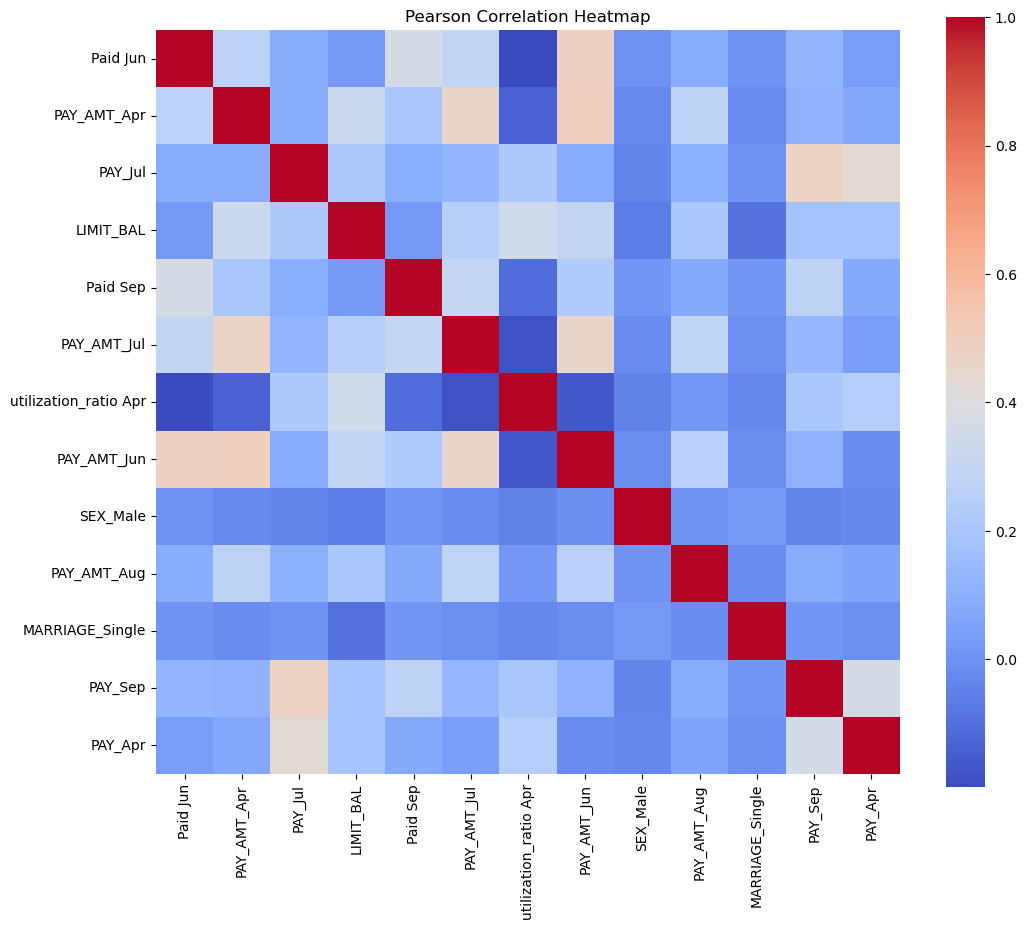

,Feature 1,Feature 2,Correlation,Absolute Correlation
0,PAY_AMT_Apr,PAY_AMT_Jun,0.498851,0.498851
1,Paid Jun,PAY_AMT_Jun,0.482982,0.482982
2,PAY_Jul,PAY_Sep,0.476032,0.476032
3,PAY_AMT_Apr,PAY_AMT_Jul,0.466896,0.466896
4,PAY_AMT_Jul,PAY_AMT_Jun,0.458772,0.458772
...,...,...,...,...
73,PAY_AMT_Jul,MARRIAGE_Single,-0.007223,0.007223
74,SEX_Male,PAY_AMT_Aug,0.005002,0.005002
75,Paid Jun,MARRIAGE_Single,0.004265,0.004265
76,Paid Jun,SEX_Male,0.003859,0.003859


In [132]:
util.correlation_summary(X_train_selected)

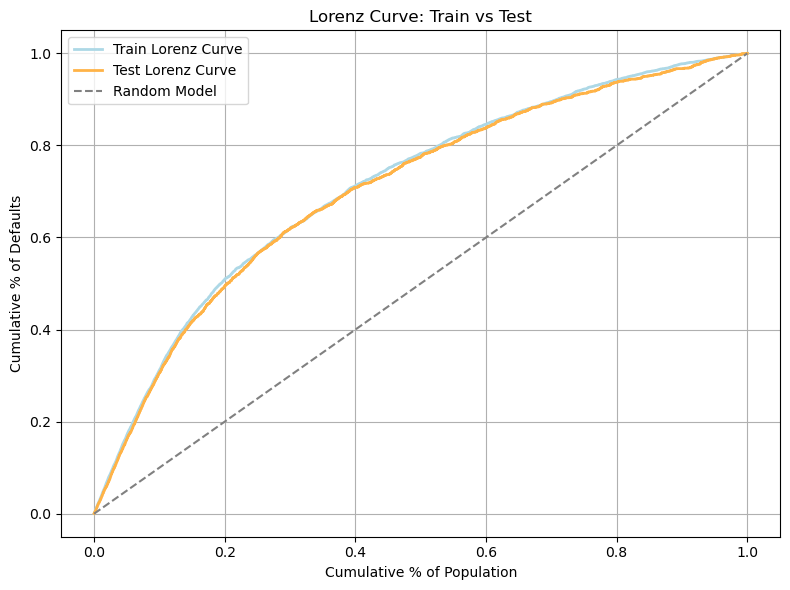

In [133]:
util.plot_lorenz_curve_train_test(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [134]:
# Evaluate
util.evaluate_model_performance(
    y_train, y_train_pred_prob, y_train_pred_label,
    y_test, y_test_pred_prob, y_test_pred_label
)


,Sample,AUC,Gini,Accuracy
0,Train,0.772764,0.545529,0.819333
1,Test,0.763242,0.526485,0.816111


In [135]:
# Example usage:
ks_table_train = util.calculate_ks_table(y_train, y_train_pred_prob)

In [136]:
ks_table_train

,Predicted Group,Total Apps,Bad Counts,Good Counts,Minimum Predicted,Maximum Predicted,Average Predicted,Error Actual,Bad %,Good %,Cumulative Bad %,Cumulative Good %,KS,Predicted Rank,Actual Rank,Rank Order Break
0,"(0.999, 2100.9]",2100,1457,643,0.552087,0.920127,0.710396,0.693810,31.16,3.94,31.16,3.94,27.22,1,1,0
1,"(2100.9, 4200.8]",2100,925,1175,0.314424,0.551824,0.417500,0.440476,19.78,7.20,50.94,11.14,39.80,2,2,0
2,"(4200.8, 6300.7]",2100,516,1584,0.203787,0.314424,0.245397,0.245714,11.04,9.70,61.98,20.84,41.14,3,3,0
3,"(6300.7, 8400.6]",2100,434,1666,0.168480,0.203787,0.184731,0.206667,9.28,10.21,71.26,31.05,40.21,4,4,0
4,"(8400.6, 10500.5]",2100,329,1771,0.144714,0.168480,0.155863,0.156667,7.04,10.85,78.29,41.90,36.40,5,5,0
5,"(10500.5, 12600.4]",2100,295,1805,0.126187,0.144714,0.135724,0.140476,6.31,11.06,84.60,52.95,31.65,6,6,0
6,"(12600.4, 14700.3]",2100,231,1869,0.111481,0.126187,0.118682,0.110000,4.94,11.45,89.54,64.40,25.14,7,7,0
7,"(14700.3, 16800.2]",2100,224,1876,0.095427,0.111481,0.103304,0.106667,4.79,11.49,94.33,75.89,18.44,8,8,0
8,"(16800.2, 18900.1]",2100,158,1942,0.080012,0.095427,0.088279,0.075238,3.38,11.90,97.71,87.79,9.92,9,9,0
9,"(18900.1, 21000.0]",2100,107,1993,0.043541,0.080012,0.066790,0.050952,2.29,12.21,100.00,100.00,0.00,10,10,0


In [137]:
ks_table_test = util.calculate_ks_table(y_test, y_test_pred_prob)

In [138]:
ks_table_test

,Predicted Group,Total Apps,Bad Counts,Good Counts,Minimum Predicted,Maximum Predicted,Average Predicted,Error Actual,Bad %,Good %,Cumulative Bad %,Cumulative Good %,KS,Predicted Rank,Actual Rank,Rank Order Break
0,"(0.999, 900.9]",900,599,301,0.533640,0.907846,0.702619,0.665556,30.56,4.28,30.56,4.28,26.29,1,1,0
1,"(900.9, 1800.8]",900,369,531,0.318482,0.533640,0.406578,0.410000,18.83,7.54,49.39,11.82,37.57,2,2,0
2,"(1800.8, 2700.7]",900,245,655,0.203787,0.318446,0.248553,0.272222,12.50,9.30,61.89,21.12,40.77,3,3,0
3,"(2700.7, 3600.6]",900,176,724,0.166809,0.203787,0.183865,0.195556,8.98,10.28,70.87,31.41,39.46,4,4,0
4,"(3600.6, 4500.5]",900,130,770,0.142741,0.166700,0.154558,0.144444,6.63,10.94,77.50,42.34,35.16,5,5,0
5,"(4500.5, 5400.4]",900,125,775,0.125121,0.142715,0.134575,0.138889,6.38,11.01,83.88,53.35,30.53,6,6,0
6,"(5400.4, 6300.3]",900,105,795,0.110006,0.125121,0.118031,0.116667,5.36,11.29,89.23,64.64,24.59,7,7,0
7,"(6300.3, 7200.2]",900,87,813,0.094817,0.110006,0.102753,0.096667,4.44,11.55,93.67,76.19,17.48,8,8,0
8,"(7200.2, 8100.1]",900,59,841,0.078402,0.094817,0.087798,0.065556,3.01,11.95,96.68,88.14,8.54,9,9,0
9,"(8100.1, 9000.0]",900,65,835,0.043541,0.078289,0.066216,0.072222,3.32,11.86,100.00,100.00,0.00,10,10,0


In [139]:
util.ks_info(y_train,y_train_pred_prob,y_test,y_test_pred_prob)

,Sample,Max KS,KS 30th Percentile
0,Train,41.14,41.14
1,Test,40.77,40.77


In [140]:
X_train_selected.shape

(21000, 13)

In [141]:
X_test_selected.shape

(9000, 13)

In [142]:
import pandas as pd

# Combine training data
df_train_2 = pd.concat([X_train_selected, y_train,y_train_pred_prob], axis=1)

# Combine testing data
df_test_2 = pd.concat([X_test_selected, y_test,y_test_pred_prob], axis=1)


In [143]:
df_train.shape

(21000, 46)

In [144]:
df_train_2.shape

(21000, 15)

In [145]:
df_test.shape

(9000, 46)

In [146]:
df_test_2.shape

(9000, 15)

In [147]:
df_train_2.rename(columns={0:'PD'},inplace=True)

In [148]:
df_test_2.rename(columns={0:'PD'},inplace=True)

In [149]:
df_train_2['adjusted_limit'] = df_train_2.apply(
    lambda x: util.adjust_credit_limit(x['LIMIT_BAL'], x['PD']),
    axis=1
)

In [150]:
df_test_2['adjusted_limit'] = df_test_2.apply(
    lambda x: util.adjust_credit_limit(x['LIMIT_BAL'], x['PD']),
    axis=1
)

In [151]:
df_train_2['limit_action'] = df_train_2['PD'].apply(util.get_limit_action)

In [152]:
df_test_2['limit_action'] = df_test_2['PD'].apply(util.get_limit_action)

In [153]:
df_train_2.groupby('limit_action')['PD'].mean()

limit_action
Decrease Slightly                0.080740
Hold                             0.046436
Review/Decrease Significantly    0.264025
Name: PD, dtype: float64

In [154]:
df_train_2['limit_action'].value_counts(dropna=False)

Review/Decrease Significantly    16287
Decrease Slightly                 4576
Hold                               137
Name: limit_action, dtype: int64

In [158]:
import pickle

# Save the model object (result)
with open('../models/logit_model.pkl', 'wb') as f:
    pickle.dump(result, f)

In [157]:
woe_temp.to_json('../models/woe_bins.json', orient='records', lines=True)
